In [3]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

#Load the dataset

df=pd.read_csv('CarPrice_Assignment.csv')
#Select features and target

X = df[['enginesize', 'horsepower', 'citympg', 'highwaympg']] # Numerical features only

y = df['price']

# Split data

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

MODEL COEFFICIENTS:
  enginesize:    4523.40
  horsepower:    1694.22
     citympg:    -392.57
  highwaympg:    -816.36
   Intercept:   13223.41

MODEL PERFORMANCE:
         MSE: 16471505.90
        RMSE:    4058.51
   R-squared:       0.79


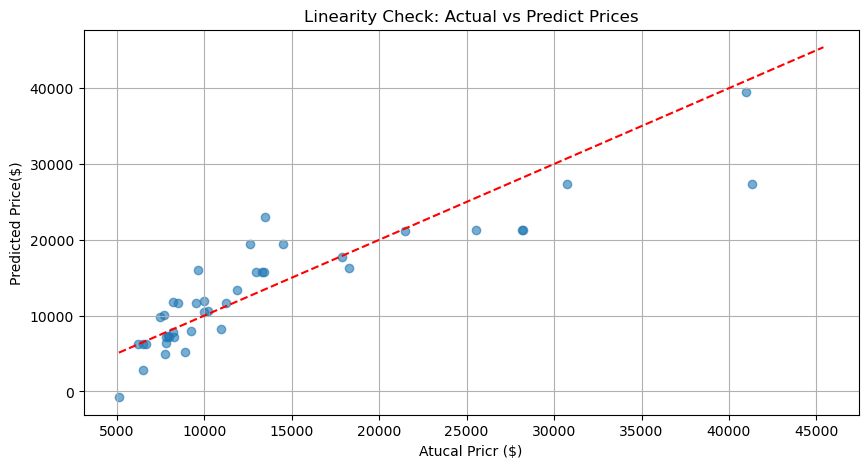


Durbin-Watson Statistic: 2.28 (Values close to 2 indicate no autocorrelation)


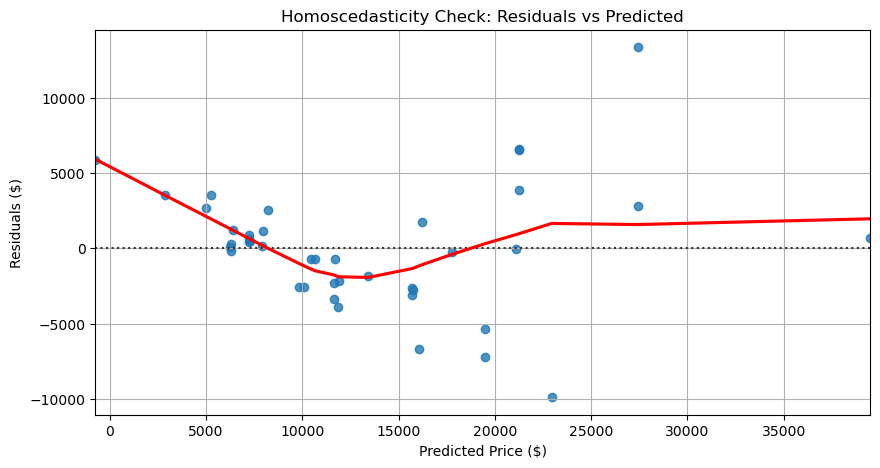

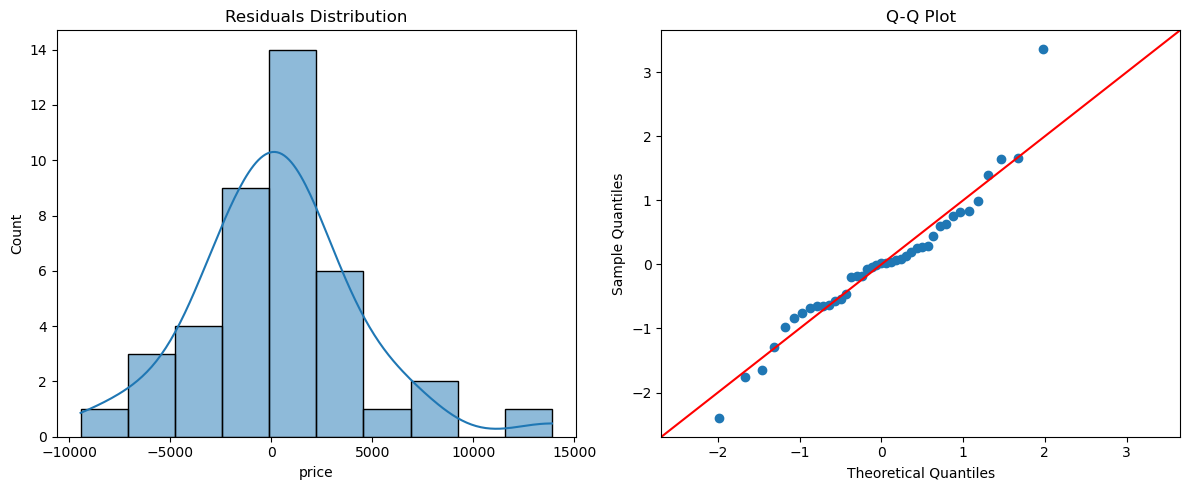

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

#Train model

model = LinearRegression()

model.fit(X_train_scaled, y_train)

#Predictions

y_pred = model.predict(X_test_scaled)

#Model coefficients and metrics

print("="*50)

print("MODEL COEFFICIENTS:")

for feature, coef in zip(X.columns, model.coef_):
      
    print(f"{feature:>12}: {coef:>10.2f}")

print(f"{'Intercept':>12}: {model.intercept_:>10.2f}")

print("\nMODEL PERFORMANCE:")

print(f"{'MSE':>12}: {mean_squared_error(y_test, y_pred):>10.2f}")

print(f"{'RMSE':>12}: {np.sqrt(mean_squared_error(y_test, y_pred)):>10.2f}")

print(f"{'R-squared':>12}: {r2_score(y_test, y_pred): >10.2f}")

print("="*50)


plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.title("Linearity Check: Actual vs Predict Prices")
plt.xlabel("Atucal Pricr ($)")
plt.ylabel("Predicted Price($)")
plt.grid(True)
plt.show()


# 2. Independence (Durbin-Watson)
residuals = y_test - y_pred
dw_test = sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f} (Values close to 2 indicate no autocorrelation)")

# 3. Homoscedasticity
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

#4
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals,kde=True,ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals,line='45',fit=True,ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()